Descriptive Analytics for Numerical Columns

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
numerical_cols=df.select_dtypes('number').columns.to_list()

In [ ]:
mmsd = df[numerical_cols].describe()
mmsd



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
mode = df[numerical_cols].mode().iloc[0]
mode

,0
Volume,3.000000
Avg Price,400.000000
Total Sales Value,24300.000000
Discount Rate (%),5.007822
Discount Amount,69.177942
Net Sales Value,326.974801


In [ ]:
mmsd.loc['mode'] = mode
required_stats = mmsd.loc[['mean', '50%', 'mode', 'std']]
required_stats = required_stats.rename(index={'50%': 'median'})
display(required_stats)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


By comparing the mean and median we can get an idea of the skewness of the distribution.
If the mean and median are close the distribution is likely symmetrical.
If the mean is significantly different from the median the distribution is skewed(right skew/left skew)
The standard deviation gives us a sense of how much individual data points typically deviate from the average.

# Data **Visualization**

HISTOGRAMS:

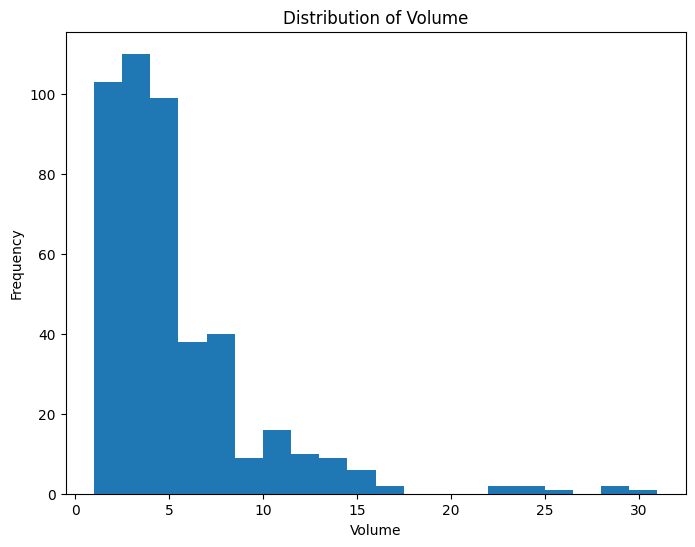

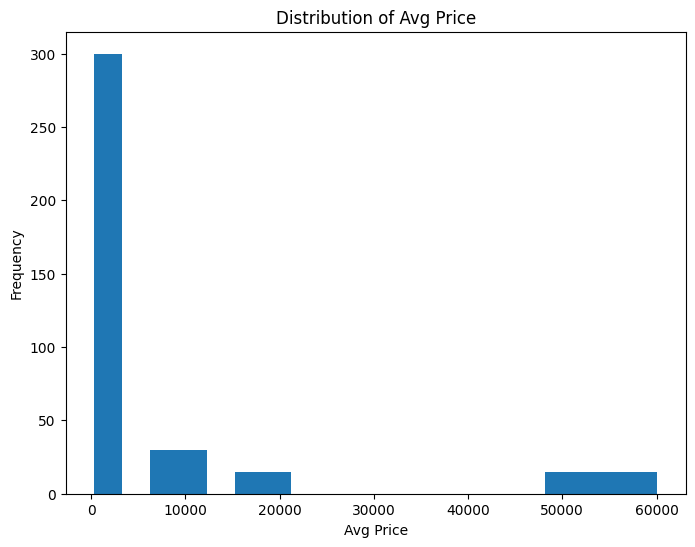

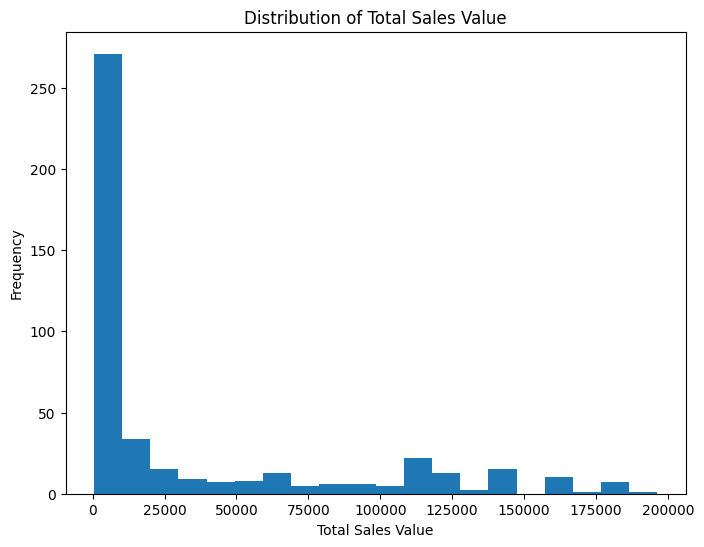

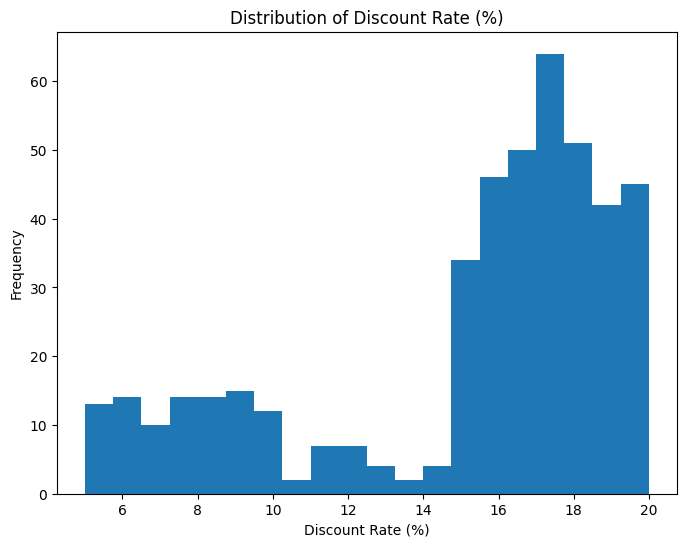

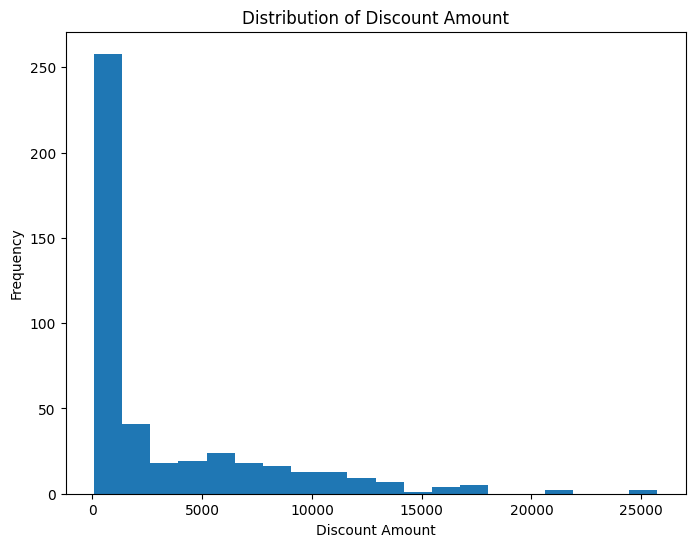

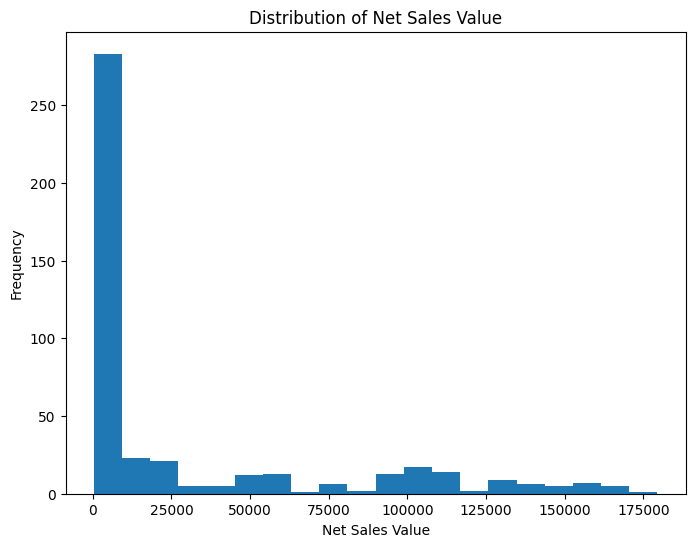

In [ ]:
import matplotlib.pyplot as plt
numerical_cols=df.select_dtypes('number').columns
for column in numerical_cols:
  plt.figure(figsize=(8,6))
  plt.hist(df[column],bins=20)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()



Most of the numerical columns (Volume, Avg Price, Total Sales Value, Discount Amount, and Net Sales Value) exhibit right-skewed distributions and likely contain outliers on the higher end. The Discount Rate (%) has a different distribution pattern. This understanding of the distributions is important for further analysis and modeling.

BOXPLOTS

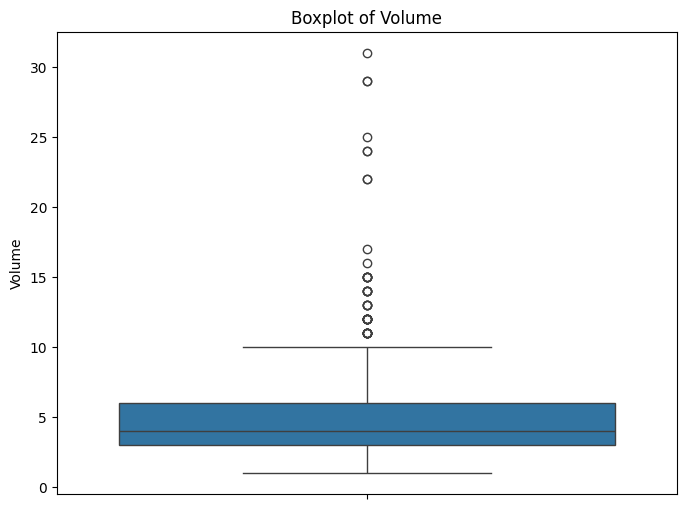

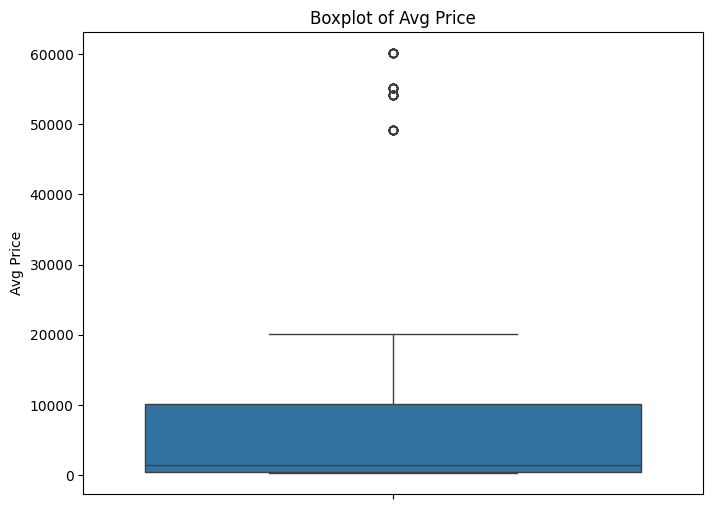

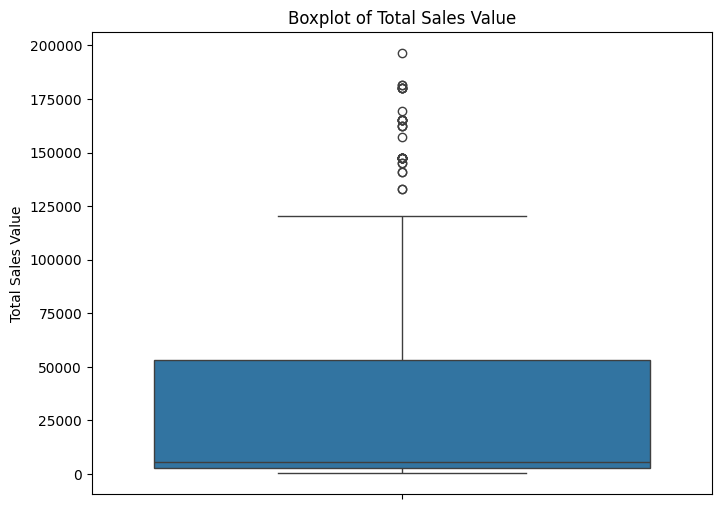

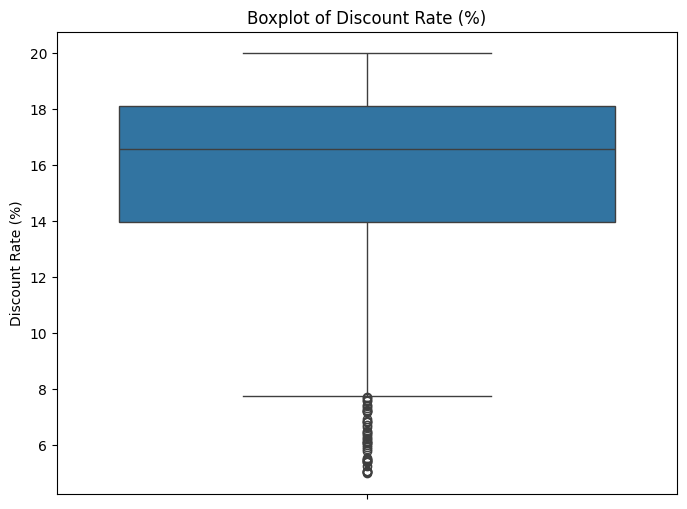

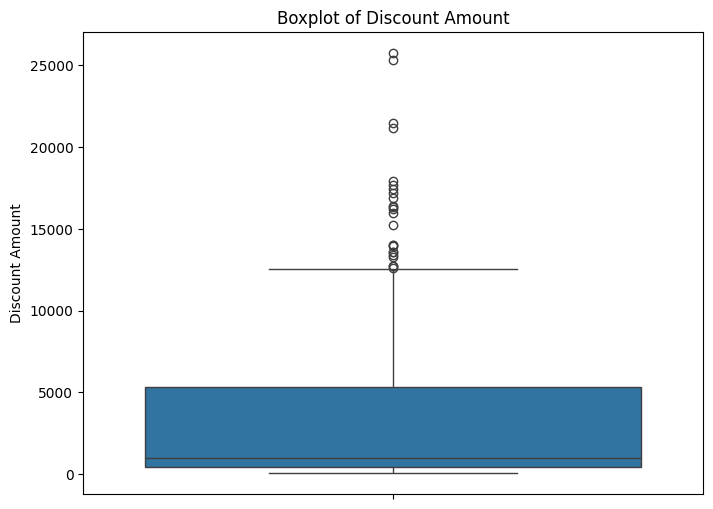

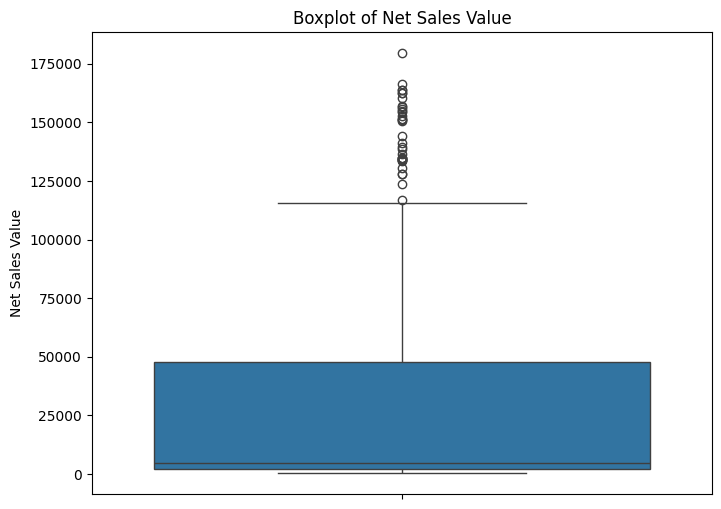

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = df.select_dtypes('number').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

 The boxplots confirm the observations from the histograms regarding the right-skewed nature of most numerical columns and the presence of numerous outliers on the higher end for Volume, Avg Price, Total Sales Value, Discount Amount, and Net Sales Value. The Discount Rate (%) shows a different distribution with some lower outliers.

	Bar Chart Analysis for Categorical Column:

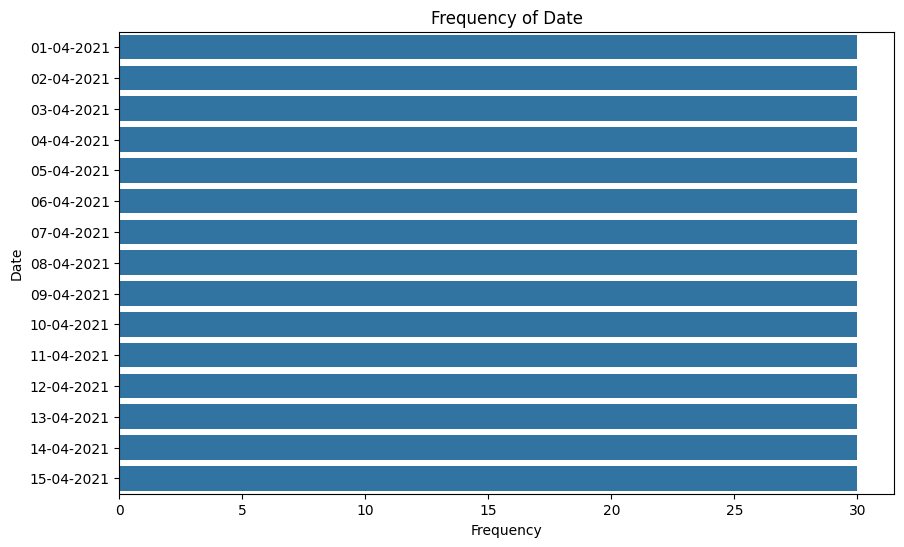

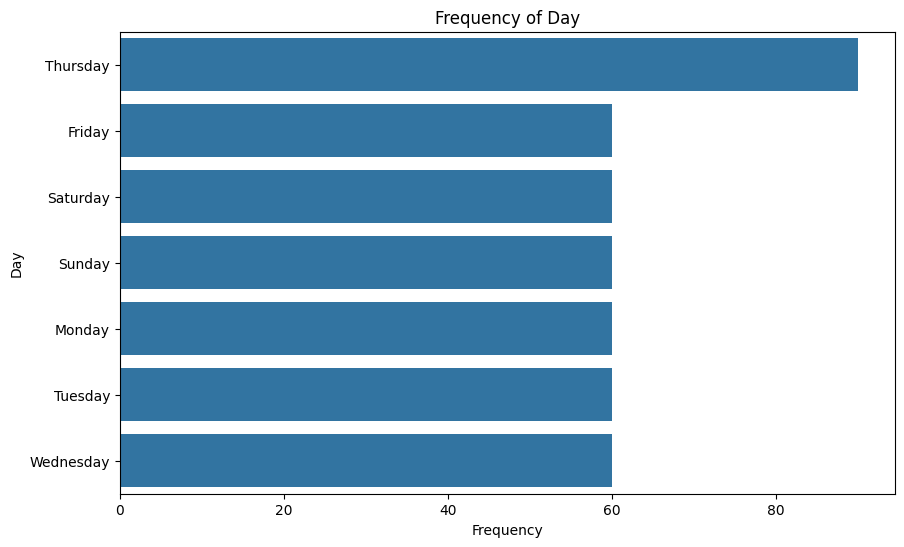

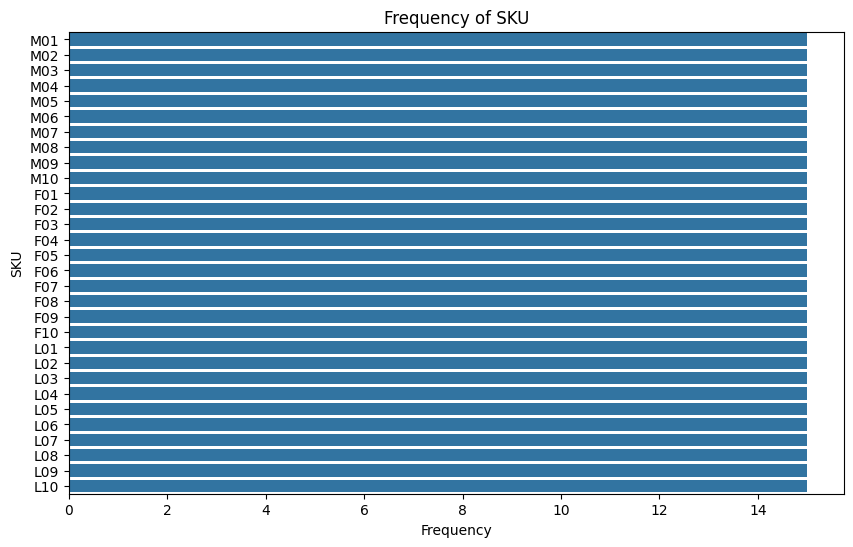

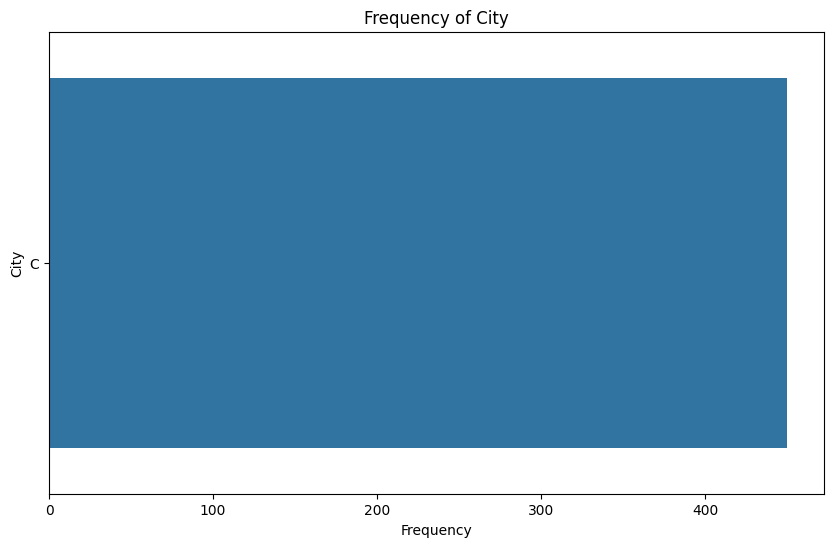

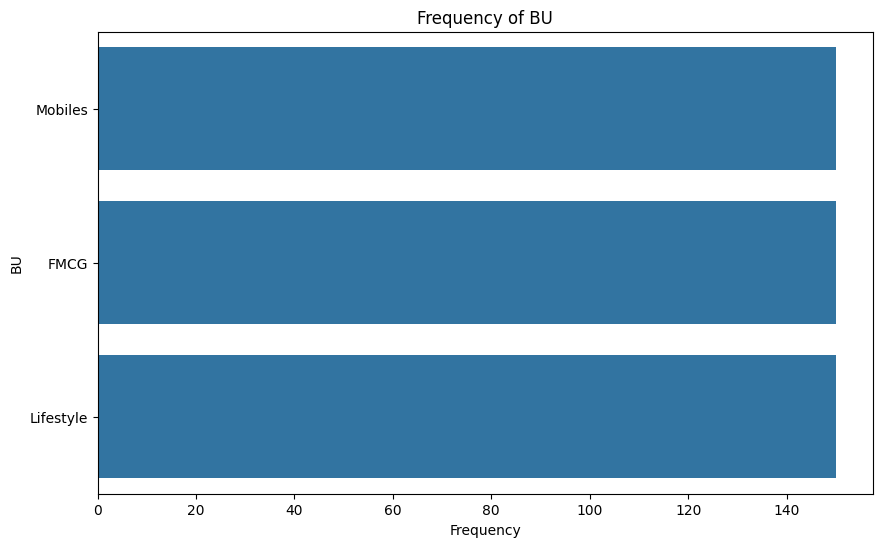

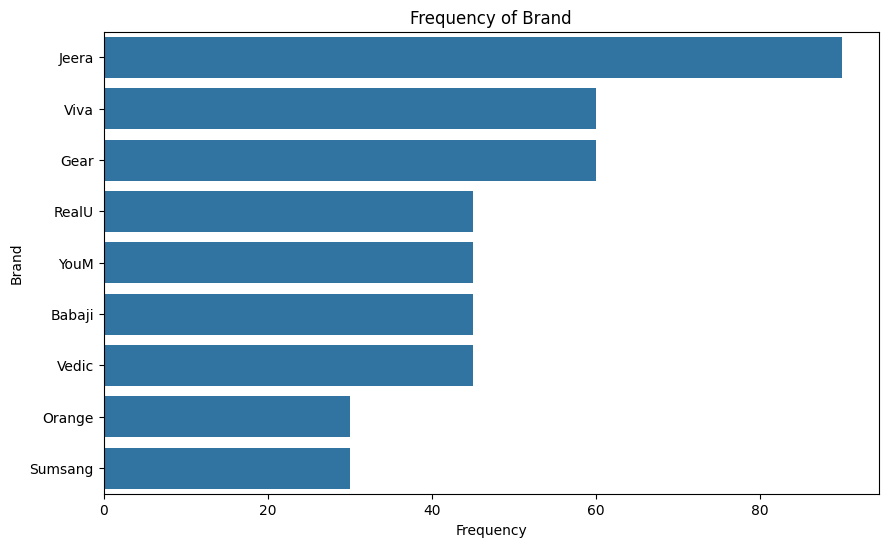

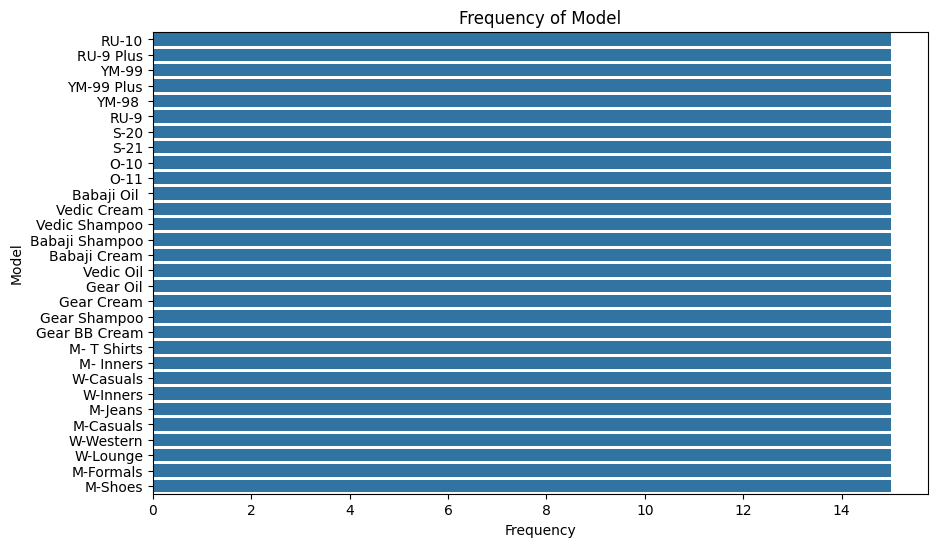

In [ ]:
categorical_cols = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()

Standardization of Numerical Variables

In [ ]:
print("Standardization (Z-score normalization) is a data preprocessing technique used to transform features so that they have a mean of 0 and a standard deviation of 1. The formula for calculating the z-score for a data point 'x' is:")
print("z = (x - mean) / standard deviation")
print("\nStandardization is important for several reasons in machine learning:")
print("1. Scaling Features: It scales features to a similar range, preventing features with larger values from disproportionately influencing the model compared to features with smaller values. This is particularly crucial for algorithms that are sensitive to the magnitude of features.")
print("2. Improving Algorithm Performance: Many machine learning algorithms perform better when features are on a similar scale. For example, distance-based algorithms like K-Nearest Neighbors and K-Means Clustering are heavily affected by feature scales.")
print("3. Faster Convergence: For optimization algorithms like Gradient Descent, standardization can lead to faster convergence by ensuring that the cost function is more spherical and less elongated, allowing the algorithm to find the minimum more efficiently.")
print("\nStandardization is particularly beneficial for algorithms such as:")
print("- K-Means Clustering")
print("- Support Vector Machines (SVMs) with radial basis function (RBF) kernels")
print("- Principal Component Analysis (PCA)")
print("- Algorithms that use gradient descent (e.g., Linear Regression, Logistic Regression, Neural Networks)")

Standardization (Z-score normalization) is a data preprocessing technique used to transform features so that they have a mean of 0 and a standard deviation of 1. The formula for calculating the z-score for a data point 'x' is:
z = (x - mean) / standard deviation

Standardization is important for several reasons in machine learning:
1. Scaling Features: It scales features to a similar range, preventing features with larger values from disproportionately influencing the model compared to features with smaller values. This is particularly crucial for algorithms that are sensitive to the magnitude of features.
2. Improving Algorithm Performance: Many machine learning algorithms perform better when features are on a similar scale. For example, distance-based algorithms like K-Nearest Neighbors and K-Means Clustering are heavily affected by feature scales.
3. Faster Convergence: For optimization algorithms like Gradient Descent, standardization can lead to faster convergence by ensuring that

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes('number').columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Before and after comparison (standardization)




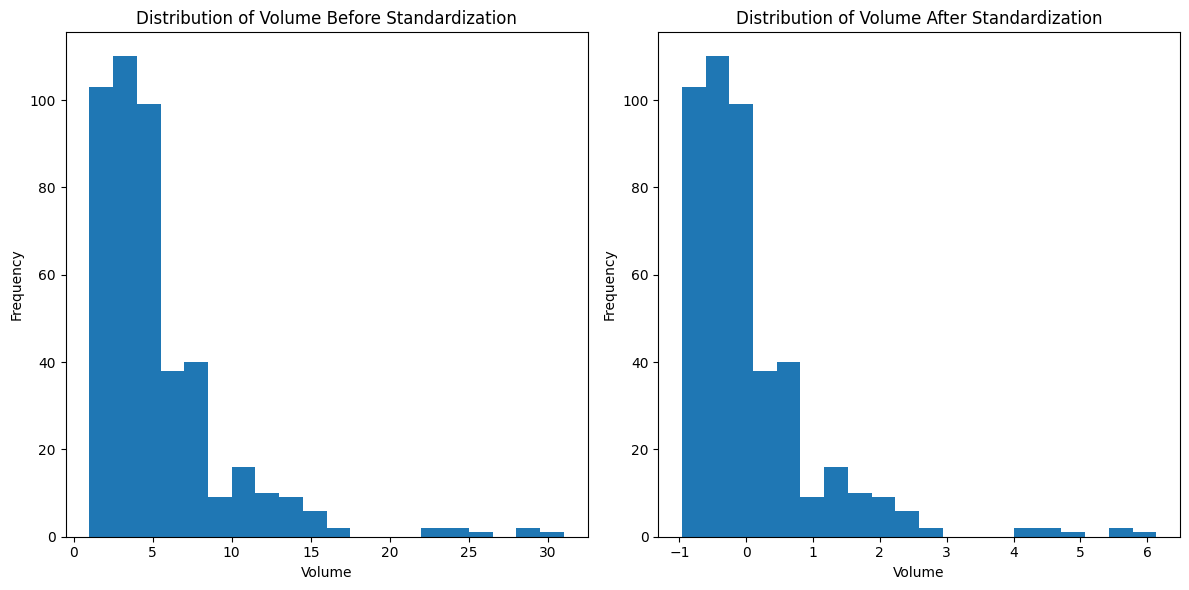

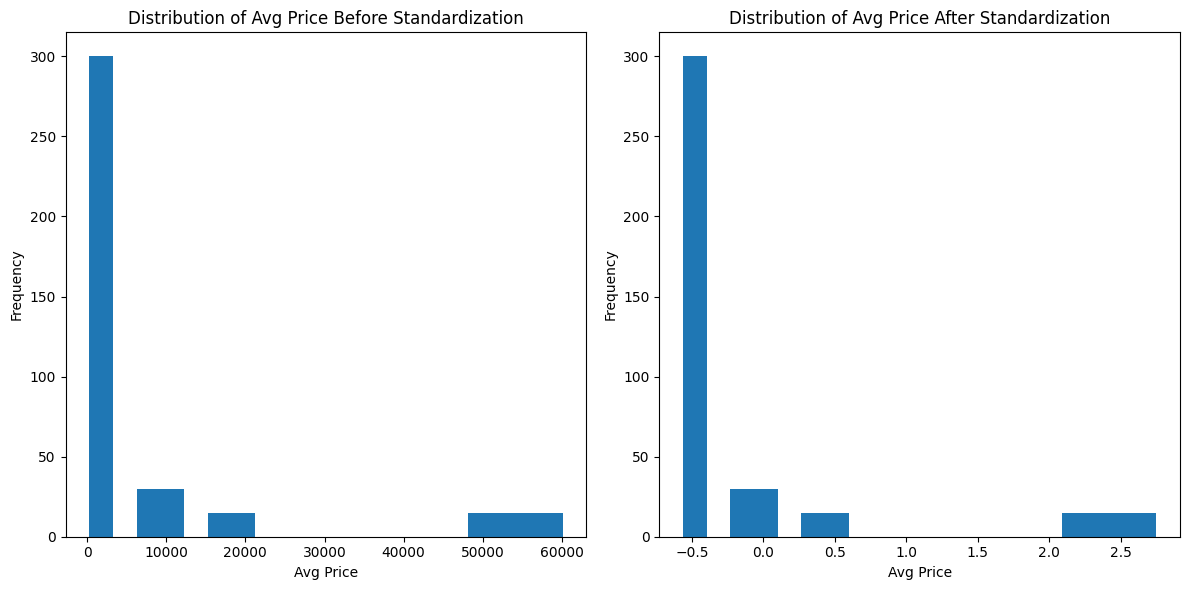

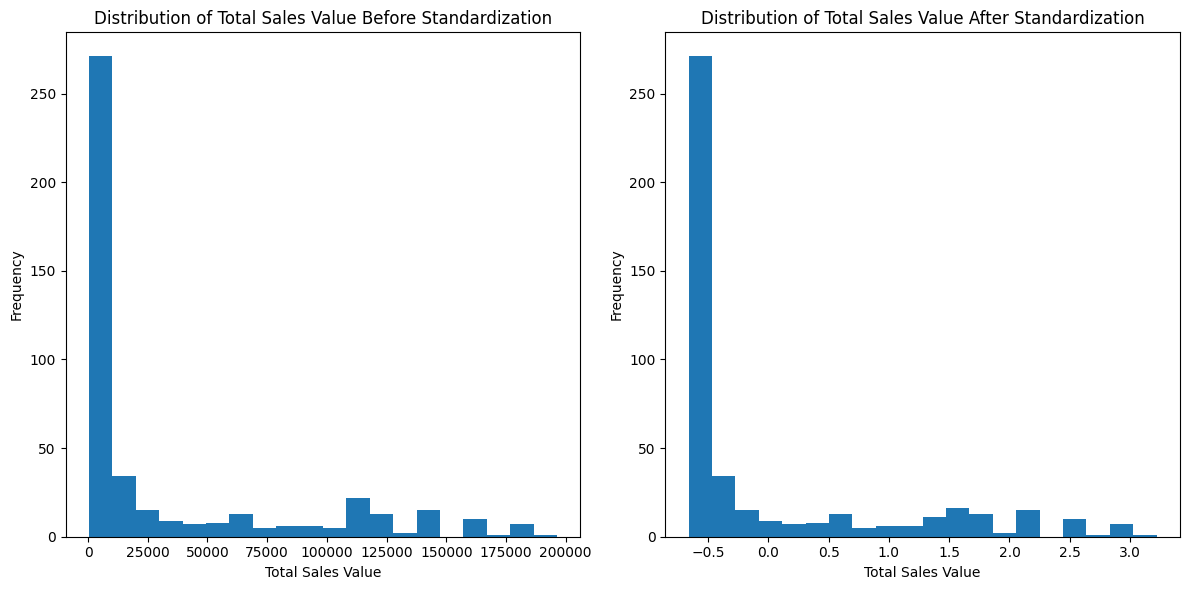

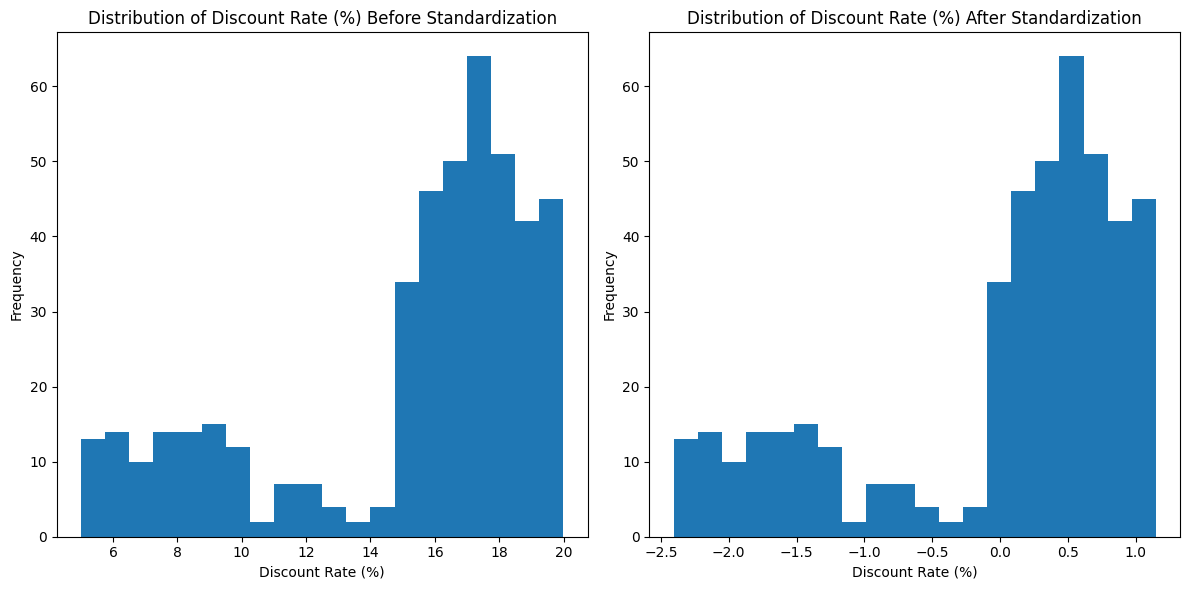

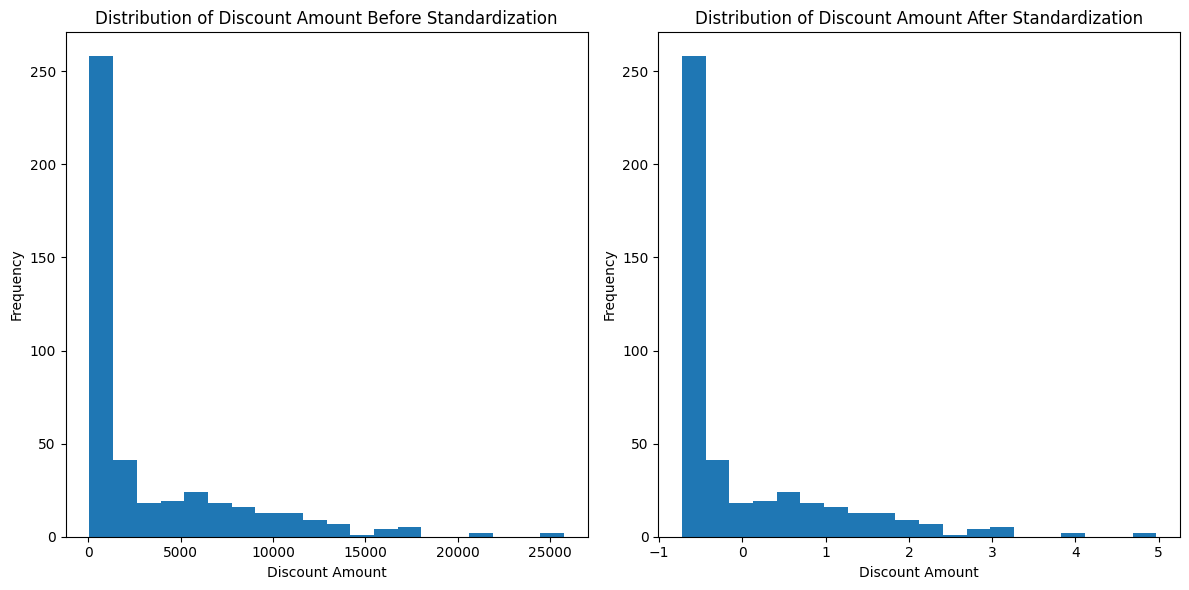

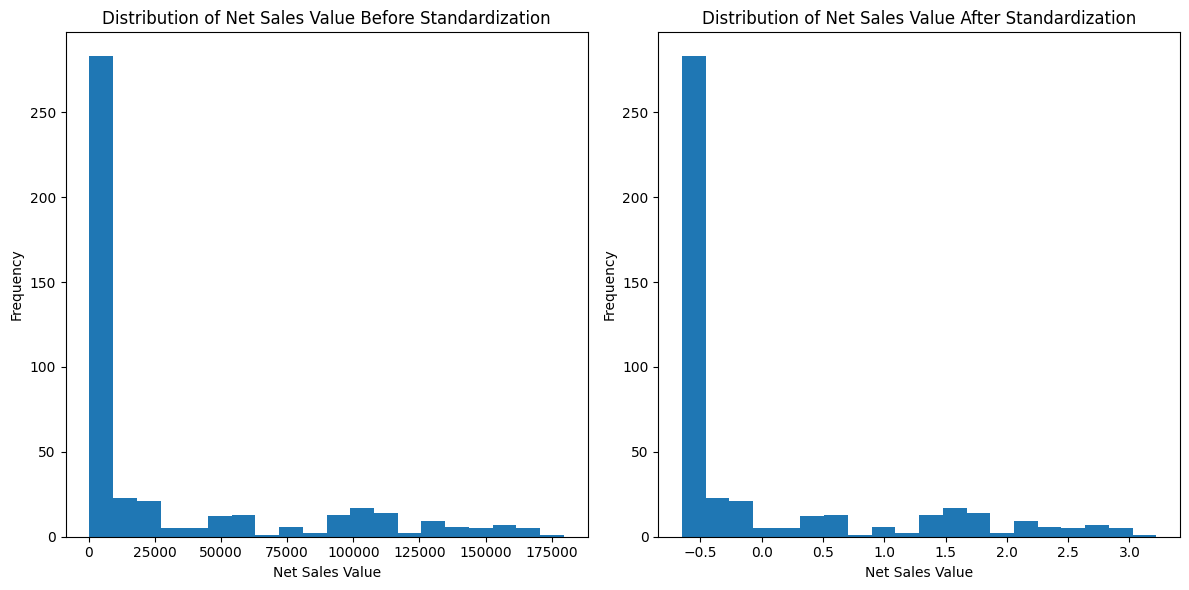

In [ ]:
numerical_cols = df.select_dtypes('number').columns
original_df = pd.read_csv('/content/sales_data_with_discounts.csv')

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram before standardization
    axes[0].hist(original_df[col], bins=20)
    axes[0].set_title(f'Distribution of {col} Before Standardization')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Plot histogram after standardization
    axes[1].hist(df[col], bins=20)
    axes[1].set_title(f'Distribution of {col} After Standardization')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## Explaining one-hot encoding

### Subtask:
Discussing the need for converting categorical data into dummy variables (one-hot encoding).


In [ ]:
print("Need for converting categorical data into dummy variables (one-hot encoding):")
print("\nMany machine learning algorithms, especially those based on mathematical equations (like linear regression, logistic regression, and support vector machines), require numerical input.")
print("Categorical variables, which represent distinct categories or groups (e.g., 'City', 'Brand'), are typically in text format and cannot be directly used in these algorithms.")
print("Converting categorical data into a numerical format is essential for these algorithms to process and learn from the data.")

print("\nConcept of One-Hot Encoding:")
print("One-hot encoding is a technique that transforms categorical variables into a numerical format by creating new binary columns for each unique category in the original column.")
print("For each row, a '1' is placed in the column corresponding to the category that the row belongs to, and '0' in all other new columns.")
print("This process effectively creates a sparse matrix representation of the categorical data, where each row has a single '1' indicating its category.")

print("\nAvoiding the Issue of Ordinality:")
print("One-hot encoding is particularly important for nominal categorical variables (categories without an inherent order, like 'City' or 'Brand').")
print("Simply assigning numerical labels (e.g., 1, 2, 3) to these categories would imply an artificial ordinal relationship or ranking between them, which does not exist in reality.")
print("This artificial ordering can mislead machine learning algorithms and negatively impact their performance.")
print("One-hot encoding avoids this issue by treating each category as a separate, independent feature, preventing the algorithm from assuming any ordinal relationship.")

Need for converting categorical data into dummy variables (one-hot encoding):

Many machine learning algorithms, especially those based on mathematical equations (like linear regression, logistic regression, and support vector machines), require numerical input.
Categorical variables, which represent distinct categories or groups (e.g., 'City', 'Brand'), are typically in text format and cannot be directly used in these algorithms.
Converting categorical data into a numerical format is essential for these algorithms to process and learn from the data.

Concept of One-Hot Encoding:
One-hot encoding is a technique that transforms categorical variables into a numerical format by creating new binary columns for each unique category in the original column.
For each row, a '1' is placed in the column corresponding to the category that the row belongs to, and '0' in all other new columns.
This process effectively creates a sparse matrix representation of the categorical data, where each row ha

## Applying one-hot encoding




In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
display(df_encoded.tail())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
449,-0.962092,-0.407171,-0.608429,0.042235,-0.637345,-0.601239,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


	Displaying a portion of the transformed dataset.

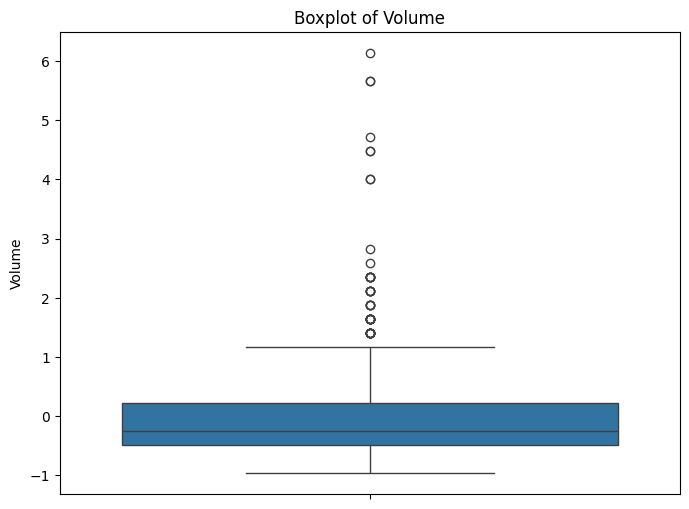

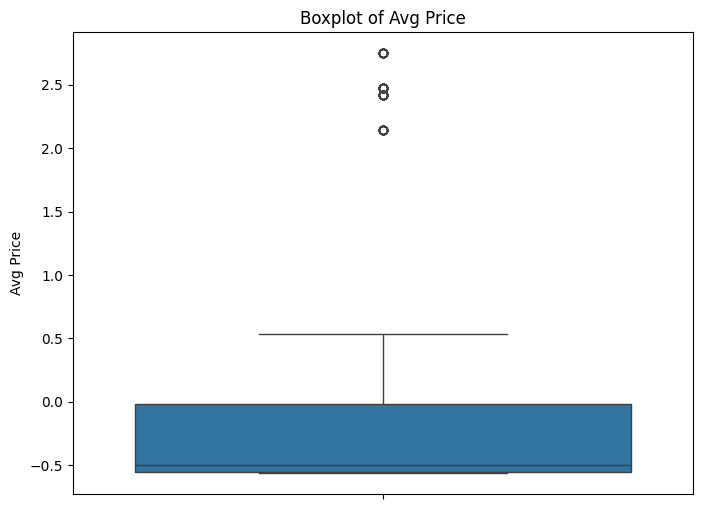

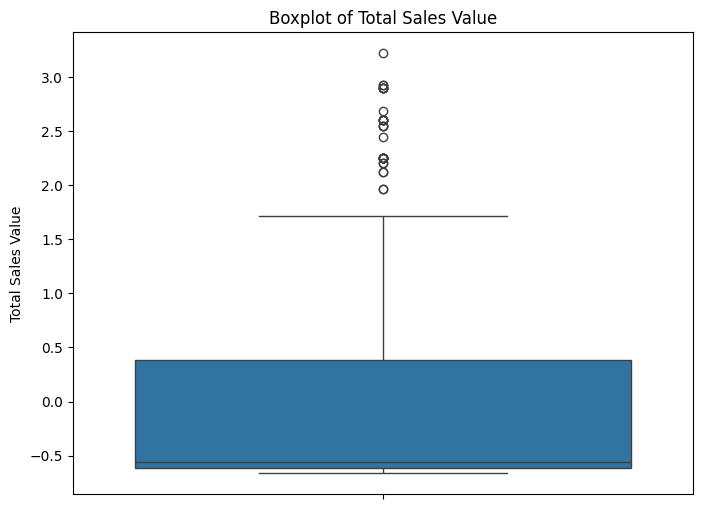

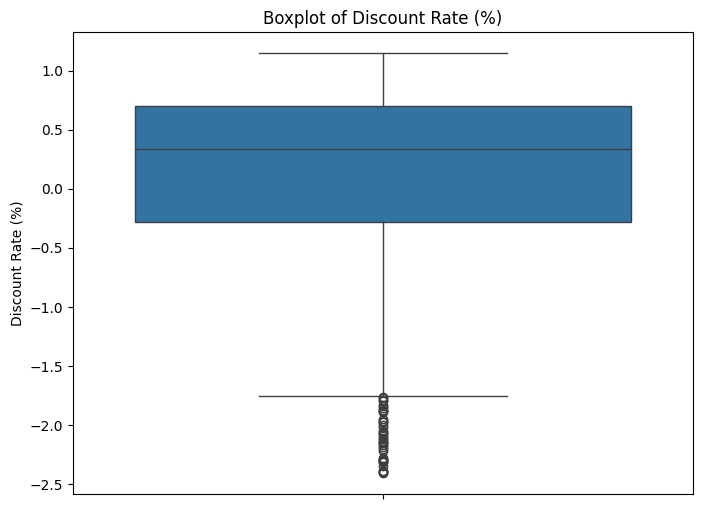

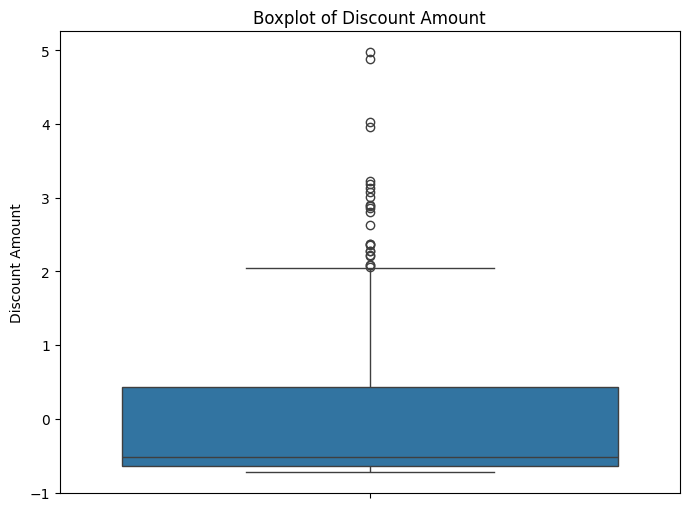

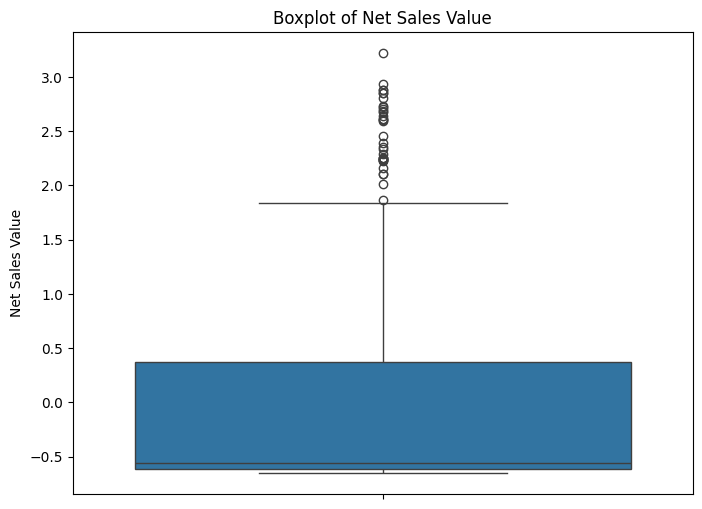

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes('number').columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

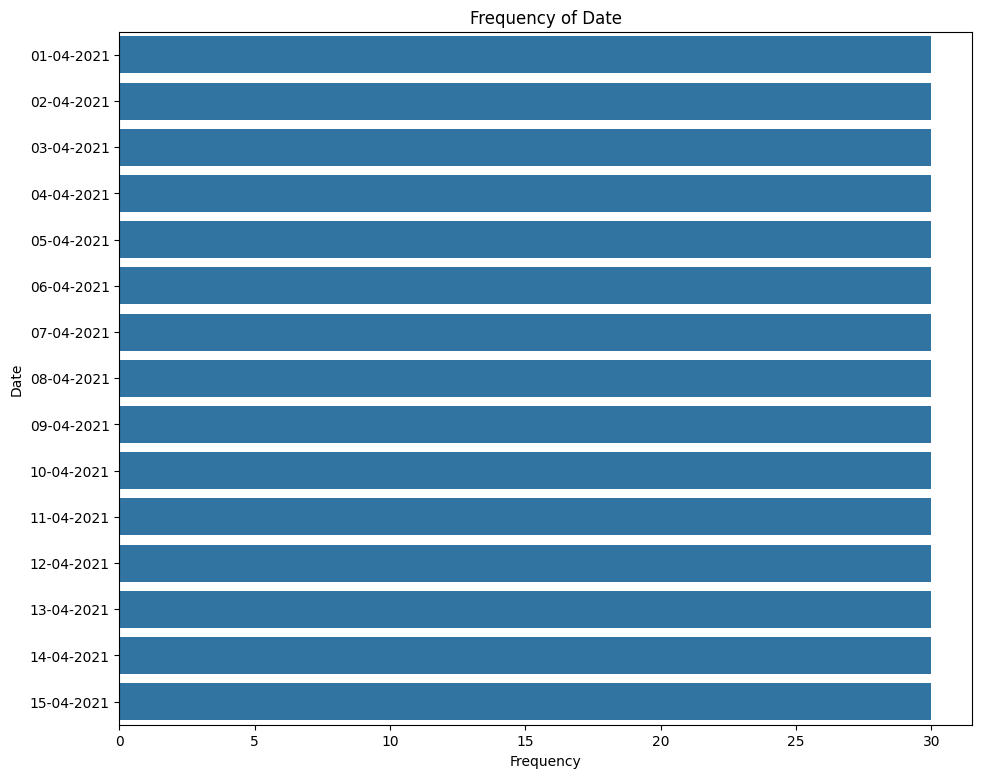

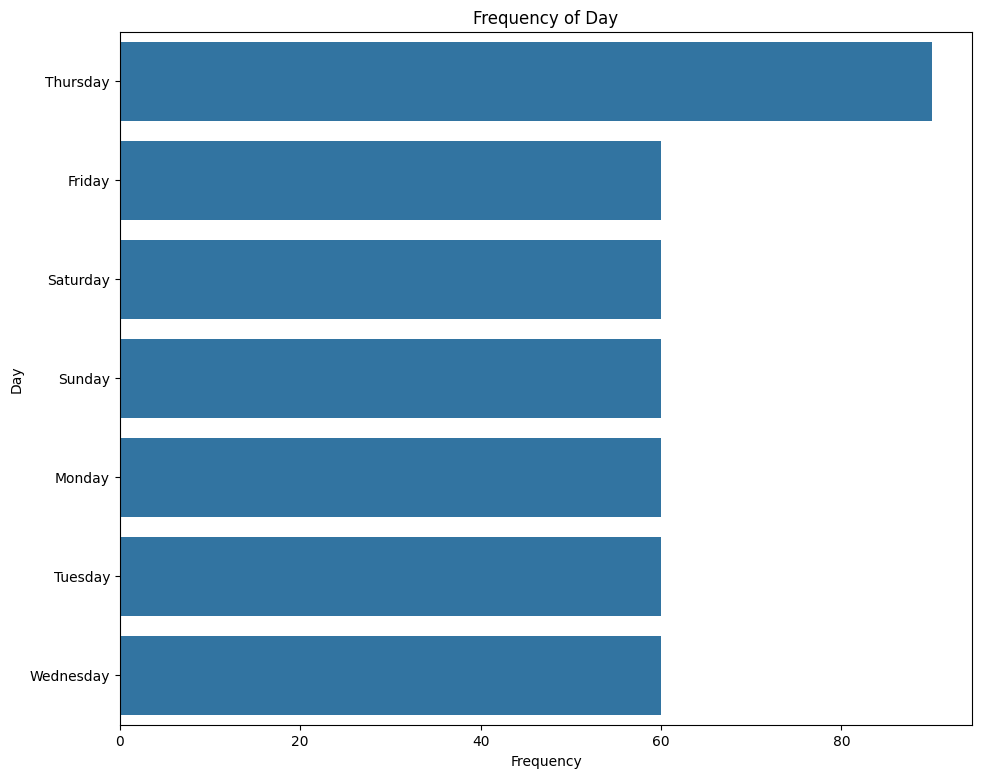

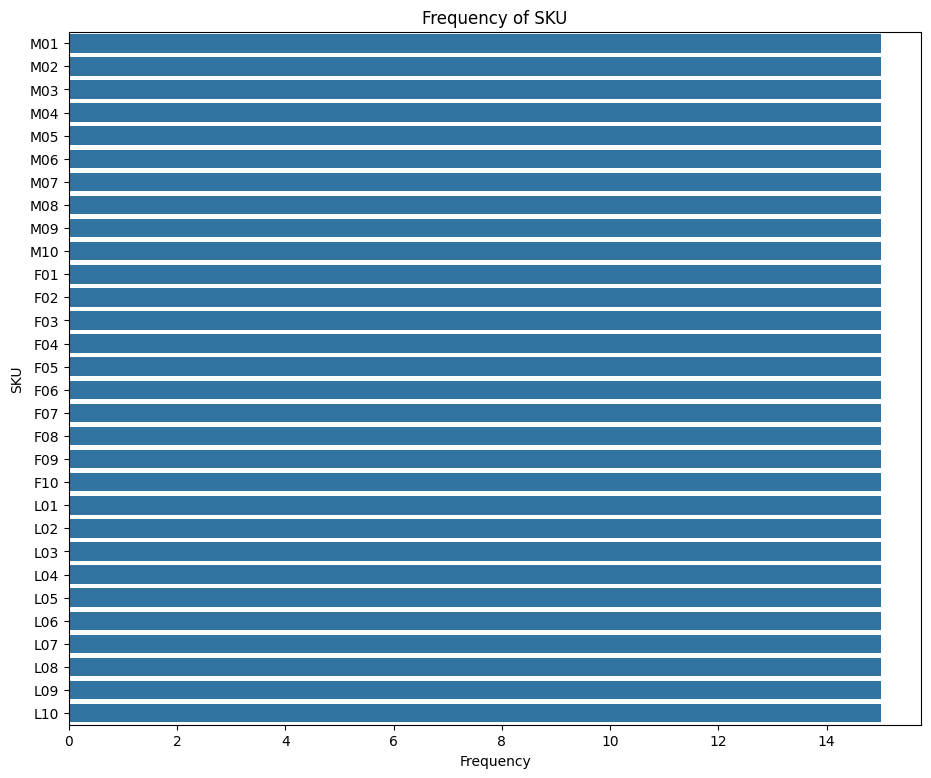

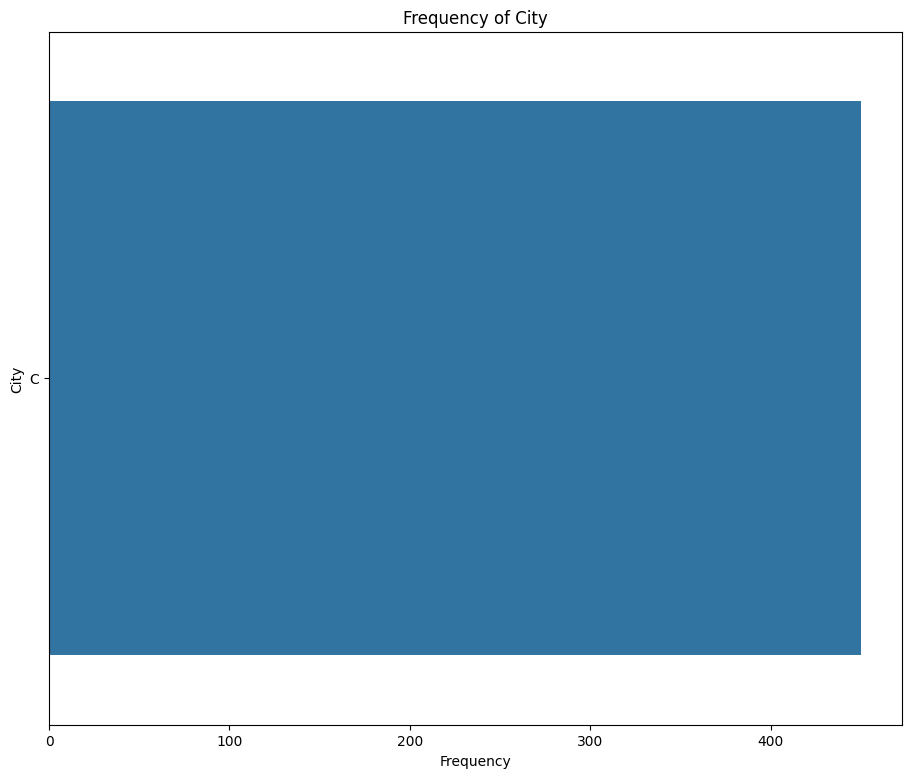

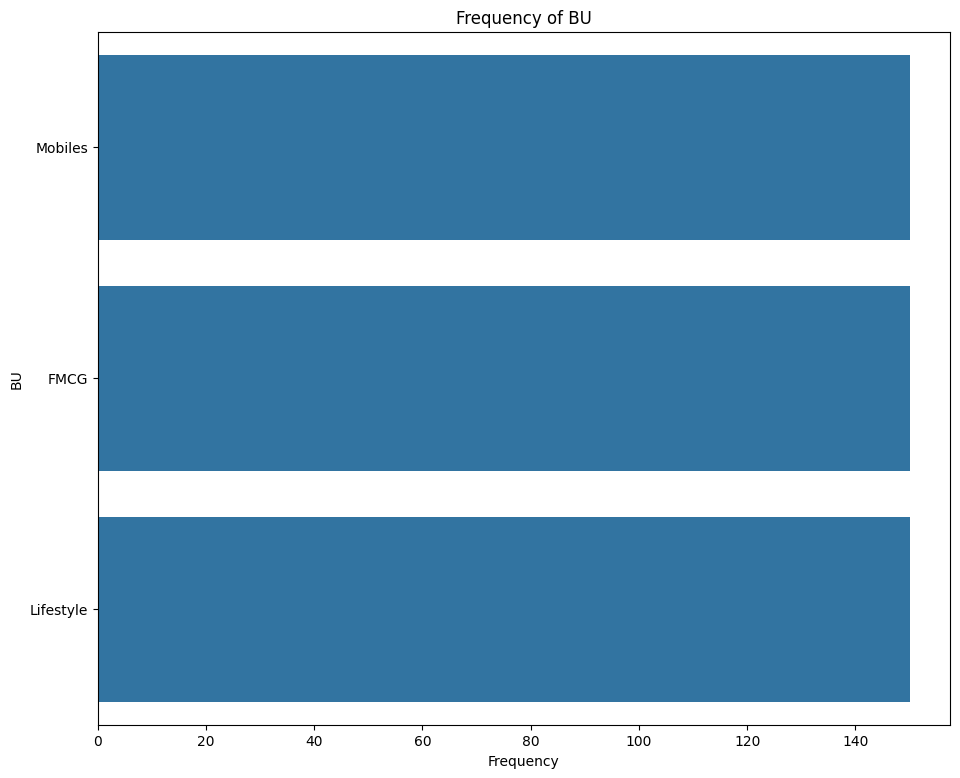

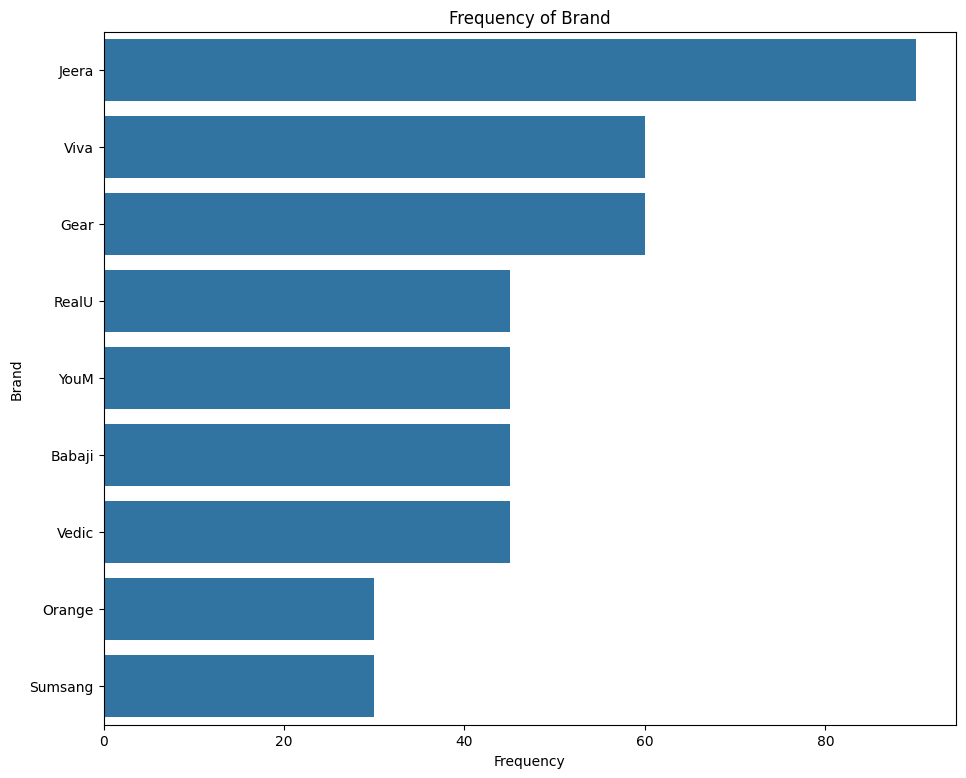

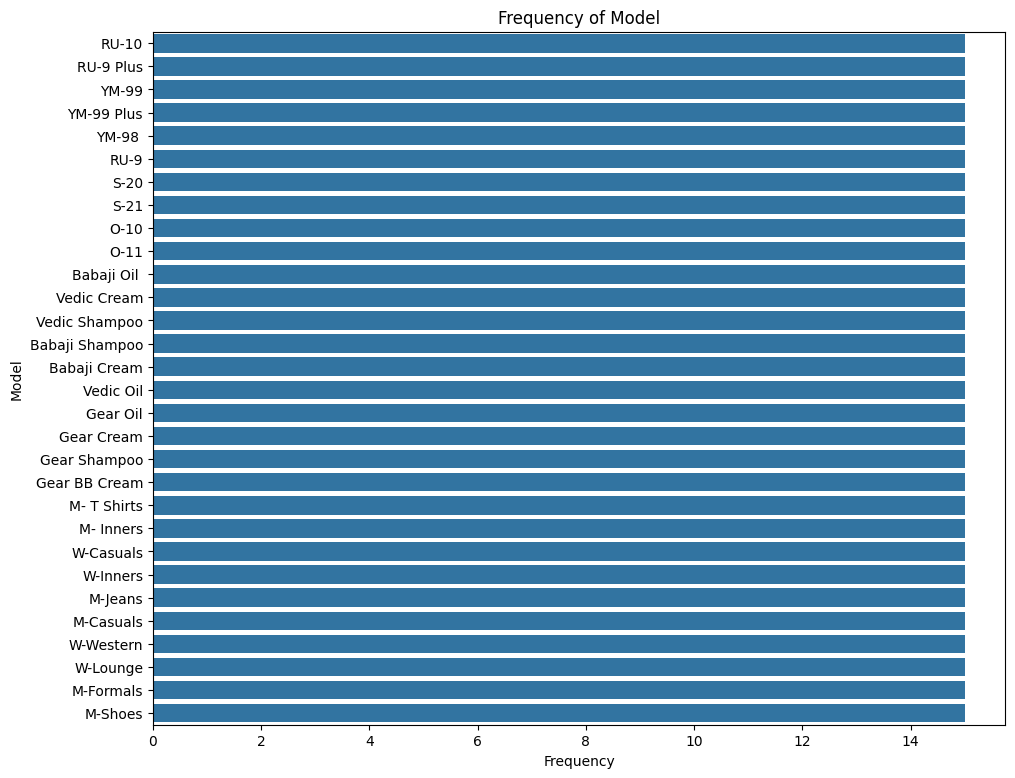

In [ ]:
categorical_cols=df.select_dtypes('object').columns
for col in categorical_cols:
  plt.figure(figsize=(11,9))
  sns.countplot(data=df,y=col,order=df[col].value_counts().index)
  plt.title(f'Frequency of {col}')
  plt.xlabel('Frequency')
  plt.ylabel(col)
  plt.show()

 The bar charts highlight that some categorical variables ('Date', 'SKU', 'Model') have very uniform distributions, while others ('Day', 'Brand') show variations in frequency. The 'City' variable indicates that the data is localized to a single city. These insights are valuable for understanding the composition of the dataset and can guide further analysis or modeling.

## Conclusion

Based on the descriptive analytics and data visualizations performed:

*   **Numerical Data:** Most numerical columns ('Volume', 'Avg Price', 'Total Sales Value', 'Discount Amount', and 'Net Sales Value') exhibit right-skewed distributions with a notable presence of outliers on the higher end, as observed in both histograms and boxplots. The 'Discount Rate (%)' shows a different distribution pattern.
*   **Categorical Data:** The bar charts revealed varying distributions among categorical columns. 'Date', 'SKU', and 'Model' have relatively uniform frequencies, while 'Day' and 'Brand' show more variation. The 'City' variable indicates that the data is from a single location.

**Importance of Data Preprocessing:**

The analysis highlighted the crucial role of data preprocessing techniques like standardization and one-hot encoding:

*   **Standardization:** By standardizing numerical features, we ensured that features with different scales do not disproportionately influence machine learning algorithms. This is particularly important for distance-based algorithms and those using gradient descent, leading to potentially faster convergence and improved model performance.
*   **One-Hot Encoding:** For categorical variables, one-hot encoding was essential to convert them into a numerical format suitable for machine learning models. This technique avoids imposing artificial ordinal relationships on nominal data, ensuring that the model treats each category as a distinct entity and preventing misleading results.

